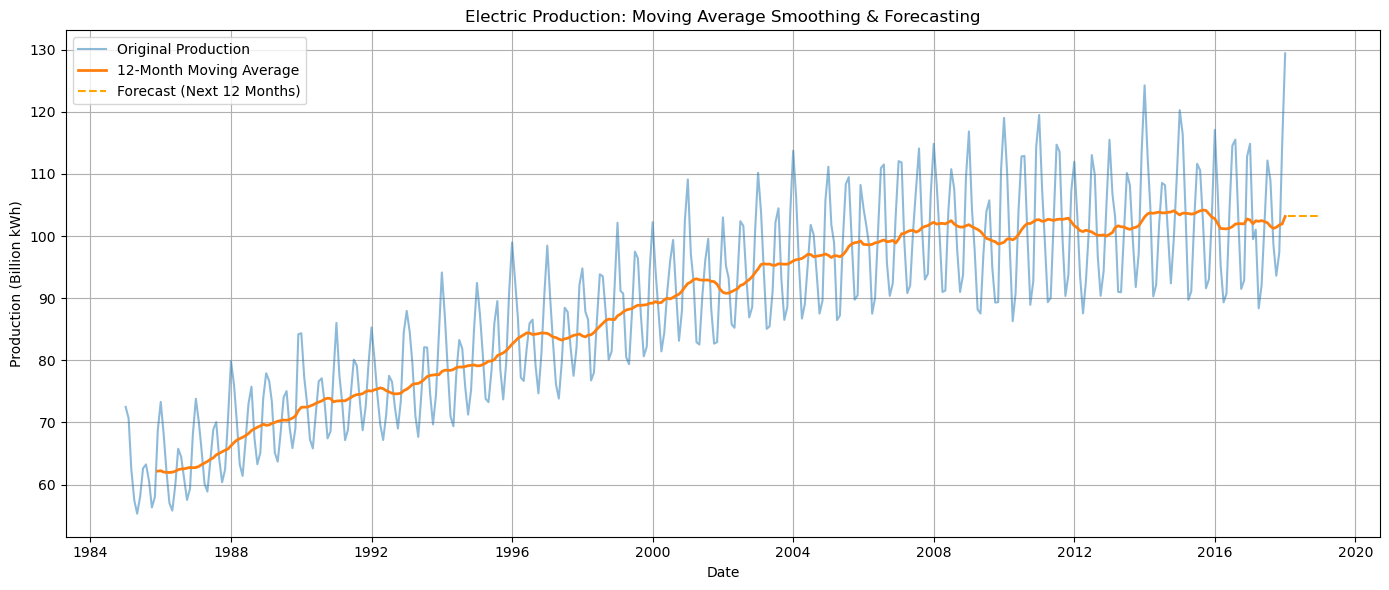

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = r"C:\Users\Lenovo\Downloads\Electric_Production.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Step 2: Convert DATE column to datetime and set as index
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Step 3: Rename the column for easier access
df.rename(columns={'IPG2211A2N': 'Production'}, inplace=True)

# Step 4: Apply Moving Average Smoothing
window_size = 12  # 12 months = 1 year
smoothed = df['Production'].rolling(window=window_size).mean()

# Step 5: Forecasting - Extend using the last smoothed value
forecast_period = 12  # Forecast next 12 months
last_value = smoothed.dropna().iloc[-1]  # Last valid smoothed value
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_period, freq='MS')
forecast = pd.Series([last_value] * forecast_period, index=future_dates)

# Step 6: Plotting the results
plt.figure(figsize=(14, 6))
plt.plot(df['Production'], label='Original Production', alpha=0.5)
plt.plot(smoothed, label=f'{window_size}-Month Moving Average', linewidth=2)
plt.plot(forecast, label='Forecast (Next 12 Months)', linestyle='--', color='orange')
plt.title('Electric Production: Moving Average Smoothing & Forecasting')
plt.xlabel('Date')
plt.ylabel('Production (Billion kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
